In [1]:
pip install pandas



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df=pd.read_csv(r"C:\Users\abuth\Downloads\Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [13]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr().T  # Transpose if needed
print(correlation_matrix)


           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


In [14]:
df.shape

(300153, 11)

In [15]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

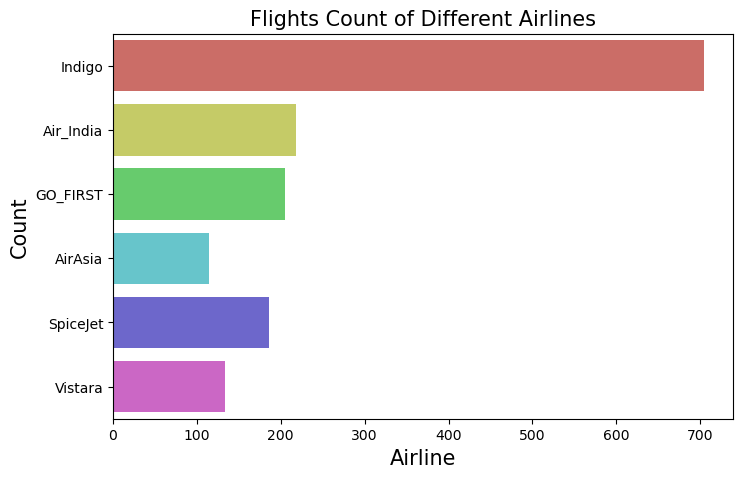

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [17]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

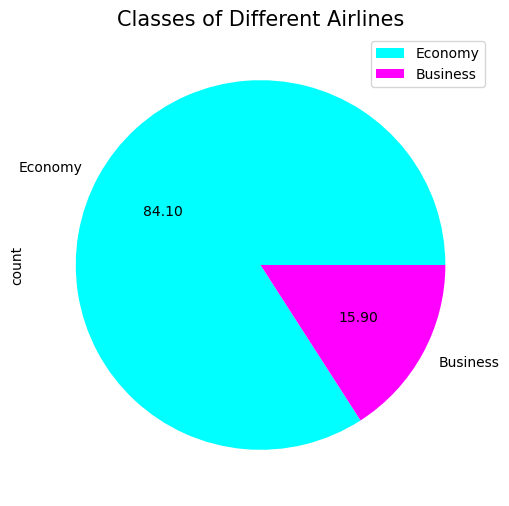

In [18]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

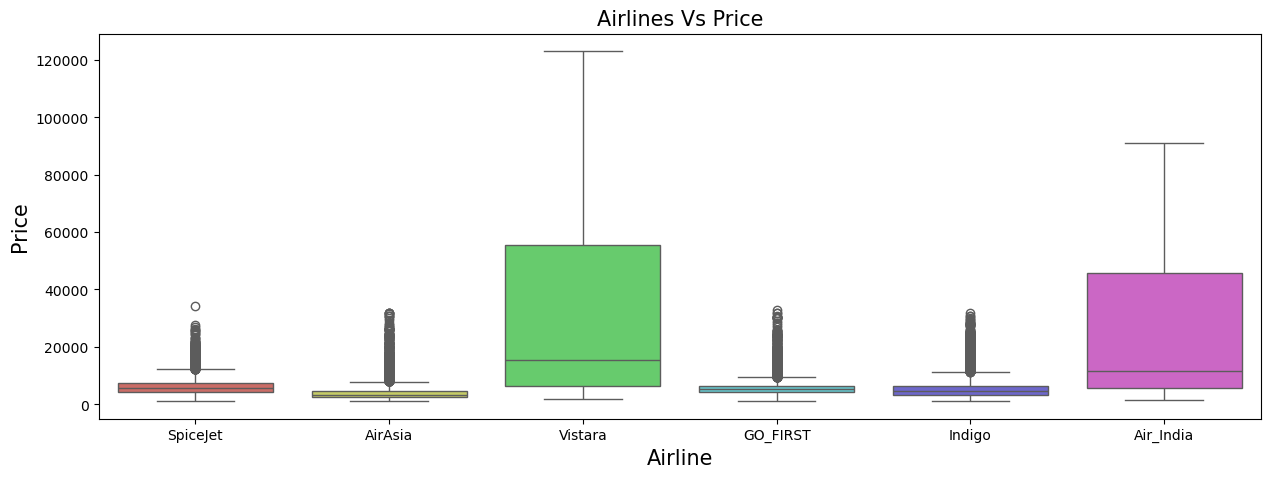

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

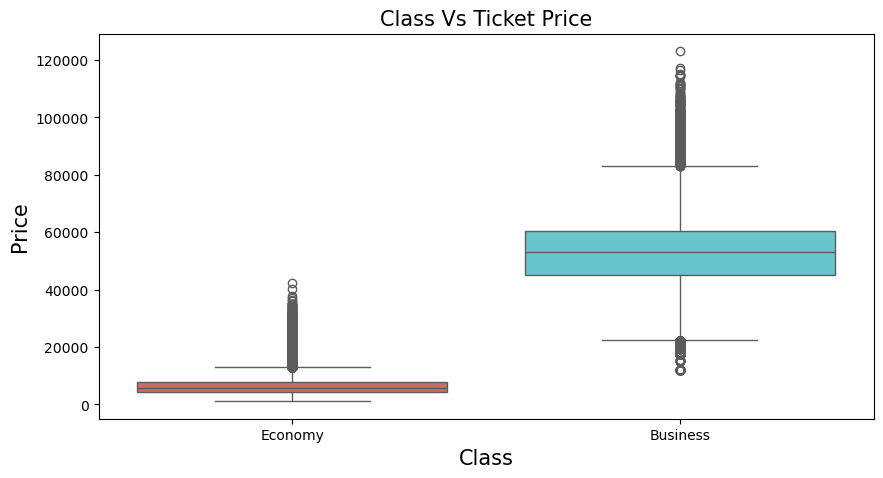

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

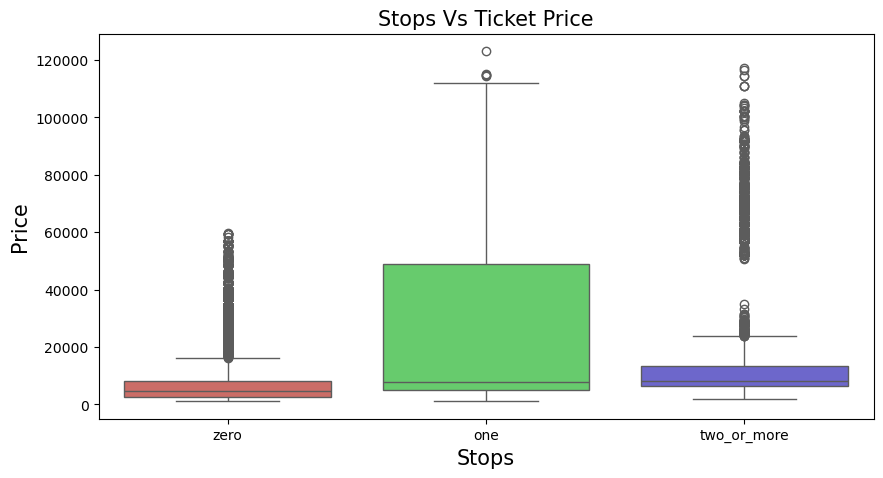

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

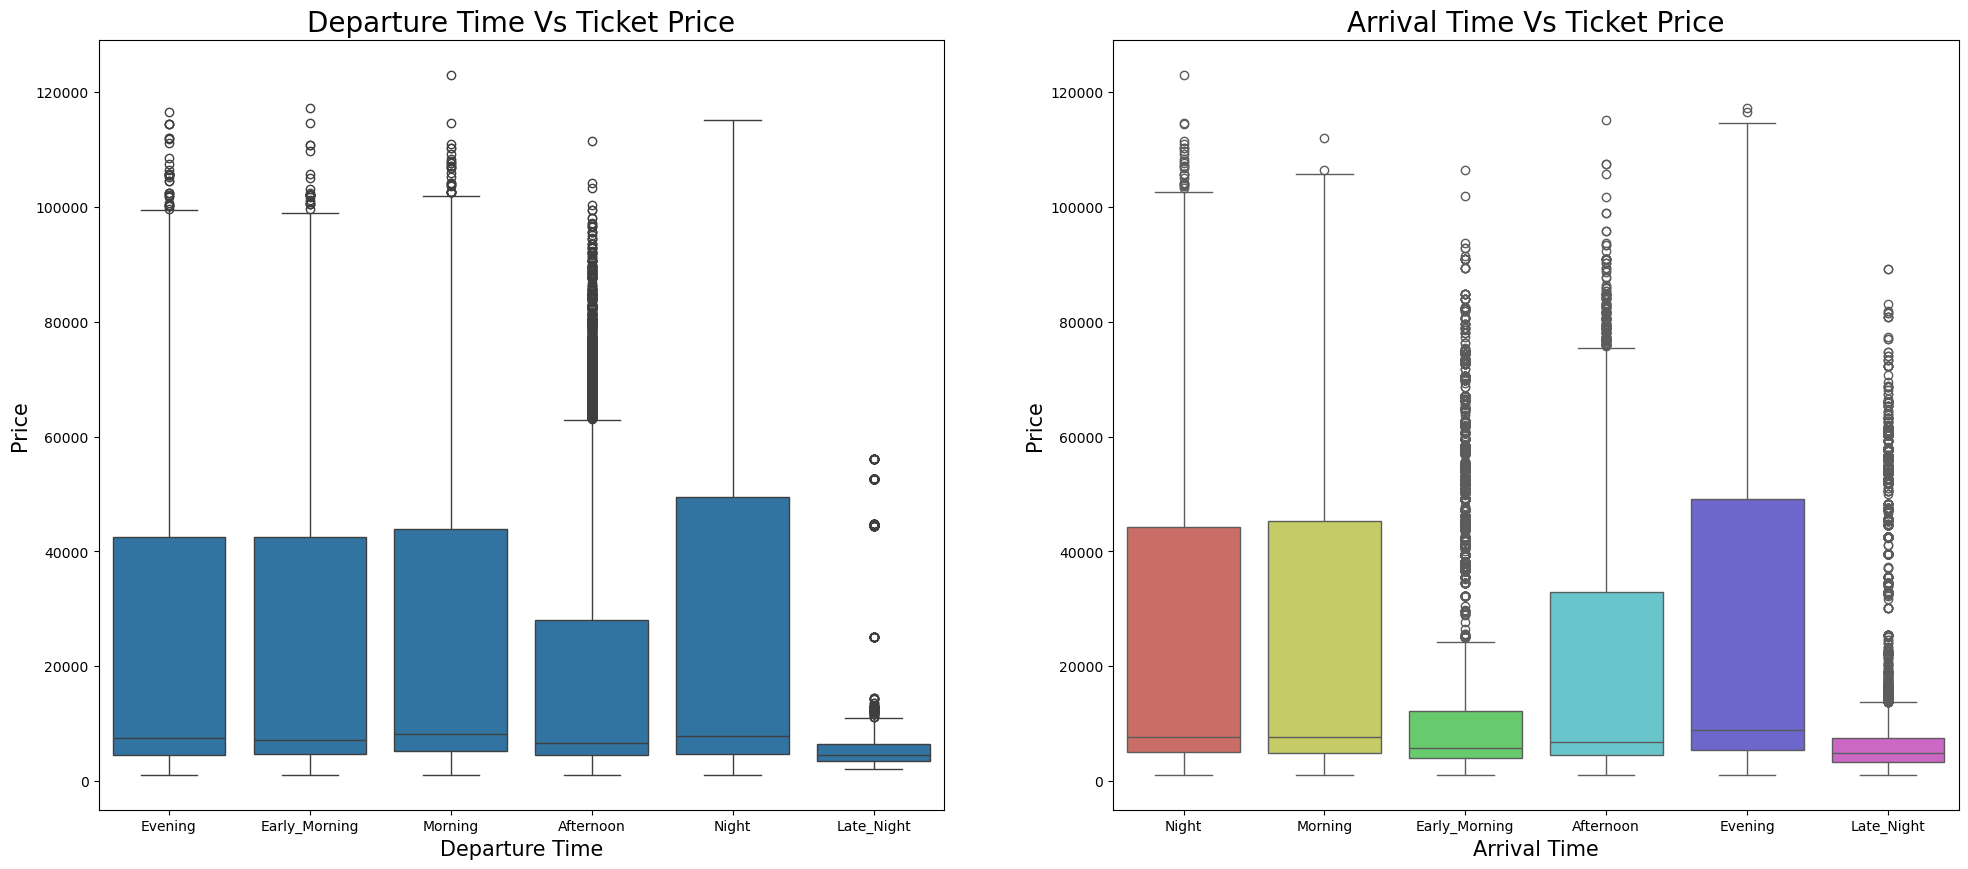

In [22]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


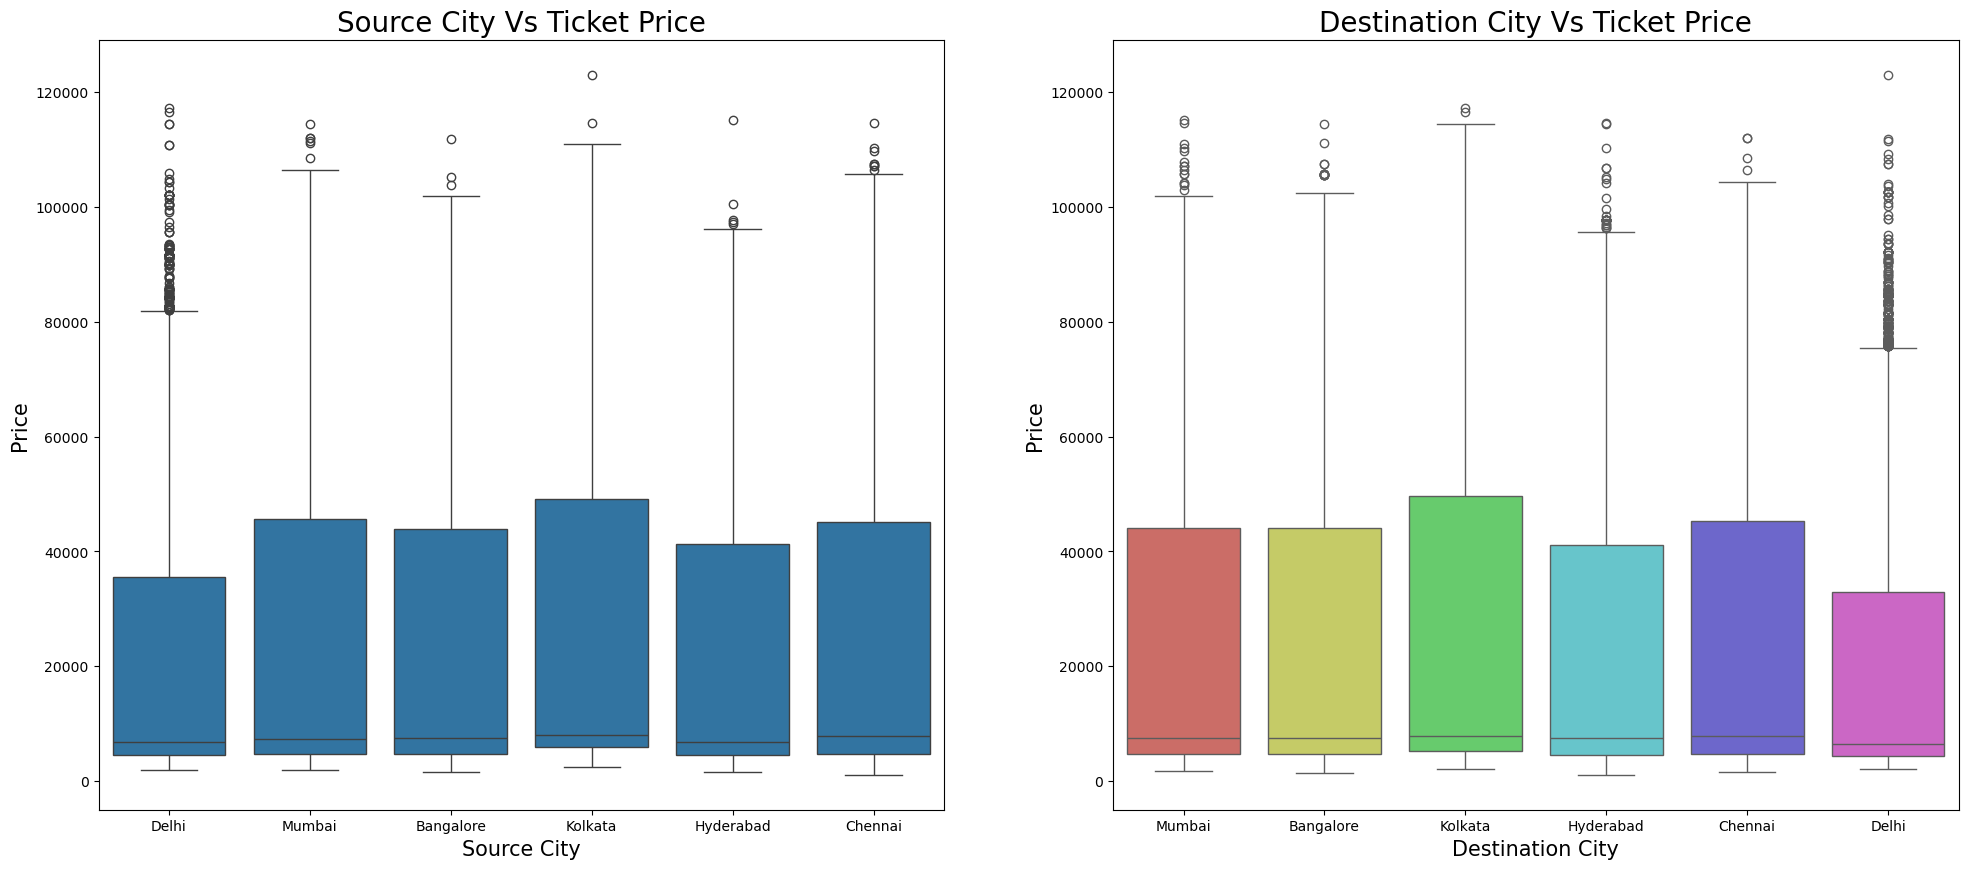

In [23]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


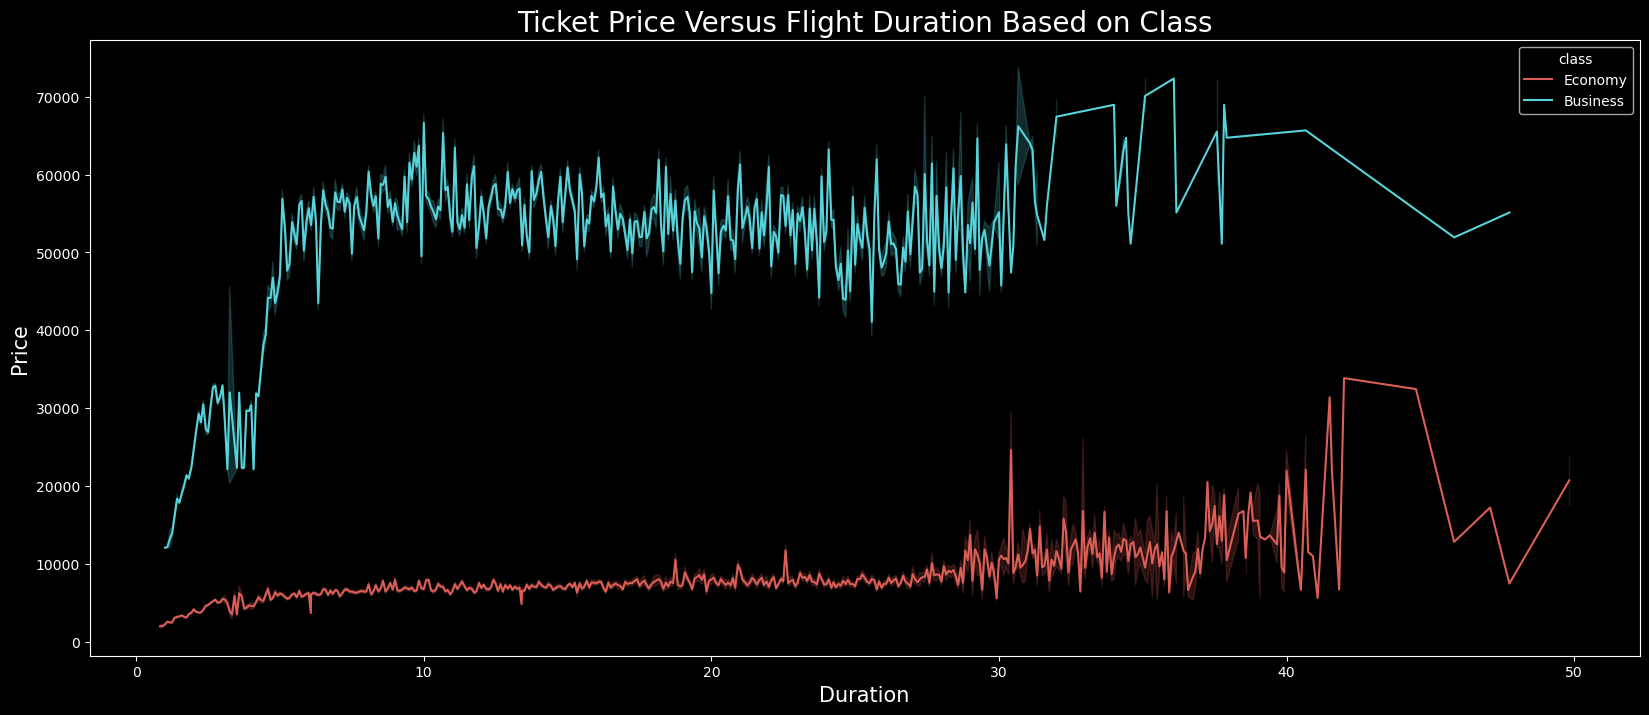

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


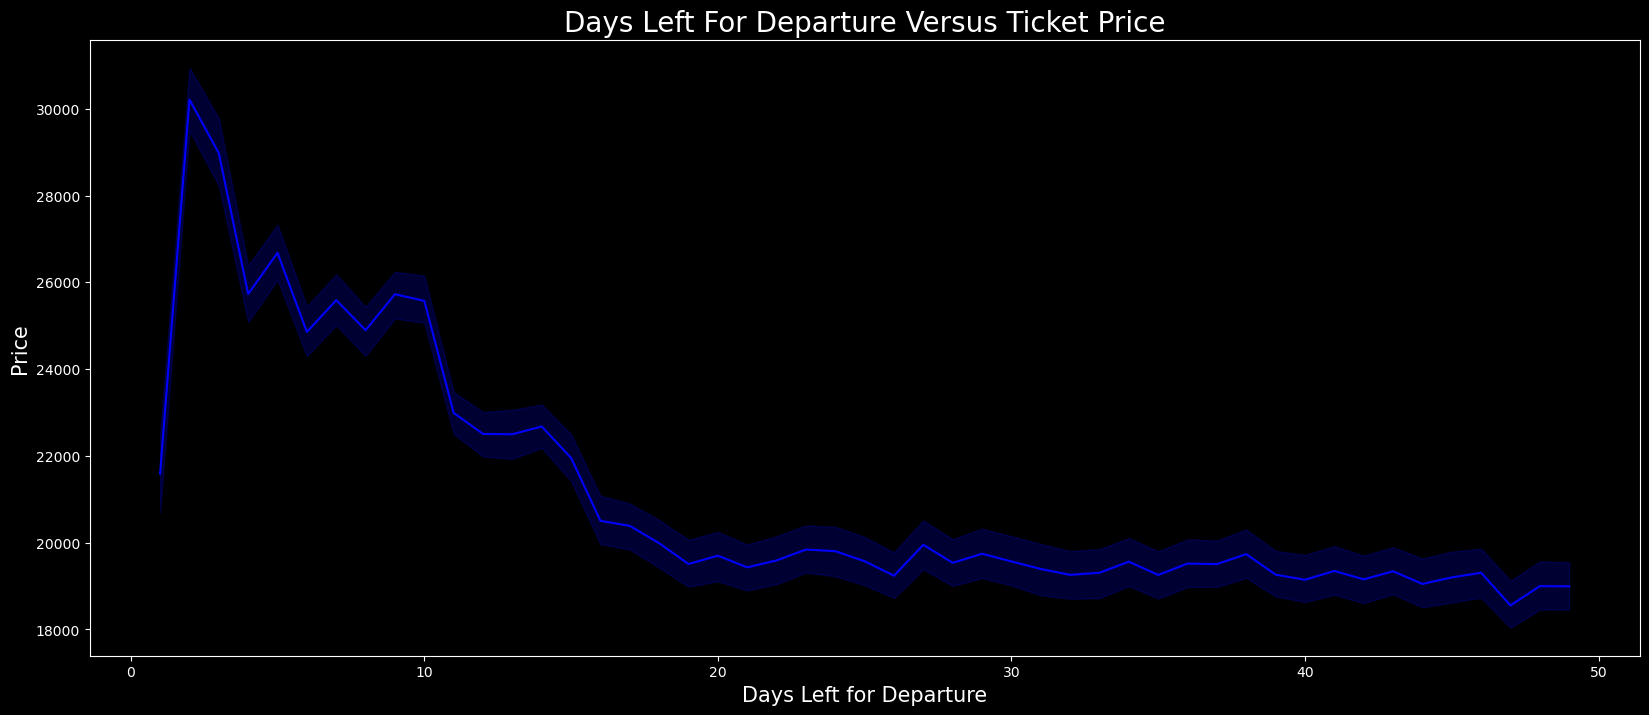

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

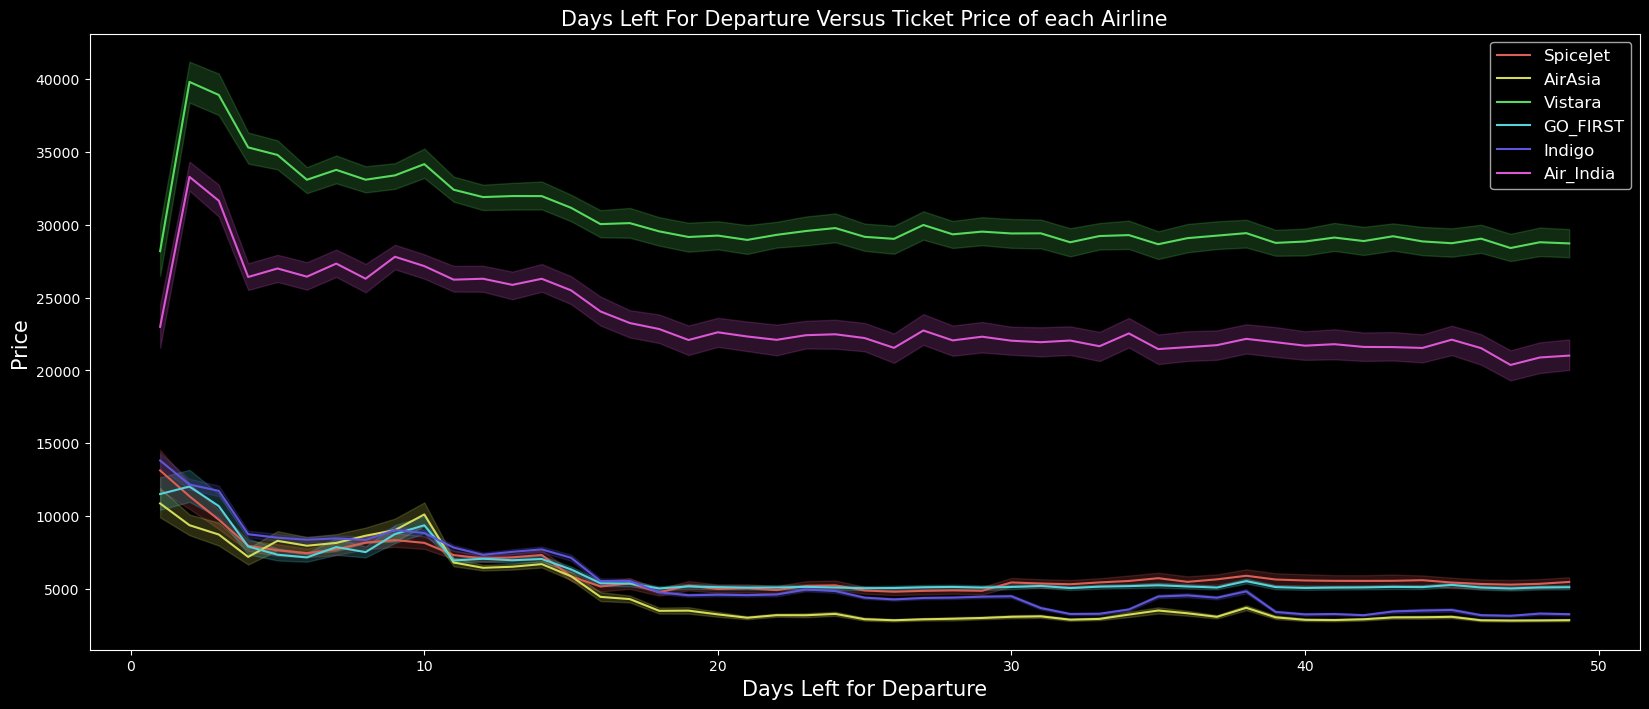

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [27]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [28]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [29]:
df_bk=df.copy()

In [30]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [31]:
x=df.drop(['price'],axis=1)
y=df['price']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [33]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [43]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [38]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 653.6 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 833.5 kB/s eta 0:02:30
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:02
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:42
   ---------------------------------------- 0.4/124.9 MB 1.4 MB/s eta 0:01:26
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.7/124.9 MB 1.7 MB/s eta 0:01:13
   ---------------------------------------- 0.8/124.9 MB 1.8 MB/s eta 0:01:08
   ---------------------------------------- 1.0/124.9 MB 2.0 MB/s eta 

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import xgboost as xgb

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(
    loss='squared_error',  # Fixed
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    random_state=None,
)

# Initialize Results DataFrame
Results = pd.DataFrame(columns=[
    'Model Name',
    'Mean_Absolute_Error_MAE',
    'Adj_R_Square',
    'Root_Mean_Squared_Error_RMSE',
    'Mean_Absolute_Percentage_Error_MAPE',
    'Mean_Squared_Error_MSE',
    'Root_Mean_Squared_Log_Error_RMSLE',
    'R2_score'
])

# Models list
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]

# Function to calculate MAPE
def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)

    # Predict the model with test data
    y_pred = models.predict(x_test)

    # Print the model name
    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis
    mae = round(metrics.mean_absolute_error(y_test, y_pred), 3)
    mse = round(metrics.mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mse), 3)
    r2 = round(metrics.r2_score(y_test, y_pred), 6)
    rmsle = round(np.log1p(rmse), 3)  # Use log1p for safety
    mape = round(MAPE(y_test, y_pred), 2)

    # Calculate Adjusted R squared
    n = len(y_test)
    p = x_test.shape[1]
    adjusted_r_squared = round(1 - (1 - r2) * (n - 1) / (n - p - 1), 6)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2_score: {r2}")
    print(f"Root Mean Squared Log Error (RMSLE): {rmsle}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"Adj R Square: {adjusted_r_squared}")
    print('-' * 100)

    # Add results to DataFrame
    new_row = {
        'Model Name': models.__class__.__name__,
        'Mean_Absolute_Error_MAE': mae,
        'Adj_R_Square': adjusted_r_squared,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Mean_Absolute_Percentage_Error_MAPE': mape,
        'Mean_Squared_Error_MSE': mse,
        'Root_Mean_Squared_Log_Error_RMSLE': rmsle,
        'R2_score': r2
    }
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

# Display Results DataFrame
print(Results)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.855
Mean Absolute Percentage Error (MAPE): 43.89%
Adj R Square: 0.904645
----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1263.777
Mean Squared Error (MSE): 13776424.453
Root Mean Squared Error (RMSE): 3711.661
R2_score: 0.973232
Root Mean Squared Log Error (RMSLE): 8.22
Mean Absolute Percentage Error (MAPE): 8.66%
Adj R Square: 0.973229
----------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1172.841
Mean Squared Error (MSE): 8220518.281
Root Mean Squared Error (RMSE): 2867.145
R2_score: 0.984027
Root Mean Squared Log Error (RMSLE): 7.961
Mean Absolute Percentag

In [46]:
Results


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression,4630.296,0.904645,7005.015,43.89,4.907024e+07,8.855,0.904656
1,DecisionTreeRegressor,1263.777,0.973229,3711.661,8.66,1.377642e+07,8.220,0.973232
2,RandomForestRegressor,1172.841,0.984025,2867.145,7.92,8.220518e+06,7.961,0.984027
3,KNeighborsRegressor,1856.933,0.971633,3820.762,11.20,1.459822e+07,8.248,0.971636
4,ExtraTreesRegressor,1144.073,0.984795,2797.202,7.62,7.824336e+06,7.937,0.984797
5,GradientBoostingRegressor,2808.067,0.956819,4713.929,20.67,2.222112e+07,8.458,0.956824
6,XGBRegressor,1862.407,0.977301,3417.713,14.23,1.168076e+07,8.137,0.977304
7,BaggingRegressor,1202.452,0.983003,2957.486,8.35,8.746723e+06,7.992,0.983005
8,Ridge,4630.313,0.904645,7005.012,43.89,4.907019e+07,8.855,0.904656
9,Lasso,4630.179,0.904645,7005.006,43.89,4.907011e+07,8.855,0.904656


In [47]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984795,1144.073,2797.202,7.62,7.824336e+06,7.937,0.984797
1,RandomForestRegressor,0.984025,1172.841,2867.145,7.92,8.220518e+06,7.961,0.984027
2,BaggingRegressor,0.983003,1202.452,2957.486,8.35,8.746723e+06,7.992,0.983005
3,XGBRegressor,0.977301,1862.407,3417.713,14.23,1.168076e+07,8.137,0.977304
4,DecisionTreeRegressor,0.973229,1263.777,3711.661,8.66,1.377642e+07,8.220,0.973232
5,KNeighborsRegressor,0.971633,1856.933,3820.762,11.20,1.459822e+07,8.248,0.971636
6,GradientBoostingRegressor,0.956819,2808.067,4713.929,20.67,2.222112e+07,8.458,0.956824
7,LinearRegression,0.904645,4630.296,7005.015,43.89,4.907024e+07,8.855,0.904656
8,Ridge Regression,0.904645,4630.313,7005.012,43.89,4.907019e+07,8.855,0.904656
9,Lasso Regression,0.904645,4630.179,7005.006,43.89,4.907011e+07,8.855,0.904656


In [49]:

modelETR.fit(x_train, y_train)

y_pred = modelETR.predict(x_test)

In [50]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [51]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
35072,Vistara,UK-899,Delhi,Afternoon,zero,Evening,Hyderabad,Economy,2.25,48,2150,2150,2293.57
153716,GO_FIRST,G8-515,Hyderabad,Morning,one,Night,Delhi,Economy,13.00,13,6132,6132,6354.66
143956,Vistara,UK-772,Kolkata,Morning,one,Early_Morning,Hyderabad,Economy,21.42,15,10782,10782,10038.45
77239,GO_FIRST,G8-321,Mumbai,Afternoon,one,Night,Hyderabad,Economy,11.00,49,3916,3916,3878.82
59338,Vistara,UK-958,Mumbai,Afternoon,one,Evening,Bangalore,Economy,29.83,37,8518,8518,7753.21
261404,Air_India,AI-573,Kolkata,Evening,one,Night,Delhi,Business,26.08,4,57939,57939,58044.00
192901,Indigo,6E-5331,Chennai,Early_Morning,zero,Early_Morning,Mumbai,Economy,1.83,42,3000,3000,3196.53
72704,GO_FIRST,G8-383,Mumbai,Afternoon,one,Late_Night,Hyderabad,Economy,9.50,19,3282,3282,3877.92
142837,Vistara,UK-720,Kolkata,Early_Morning,one,Afternoon,Hyderabad,Economy,5.42,5,11675,11675,13299.22
83343,Vistara,UK-940,Mumbai,Evening,one,Night,Chennai,Economy,24.50,44,4348,4348,4443.92


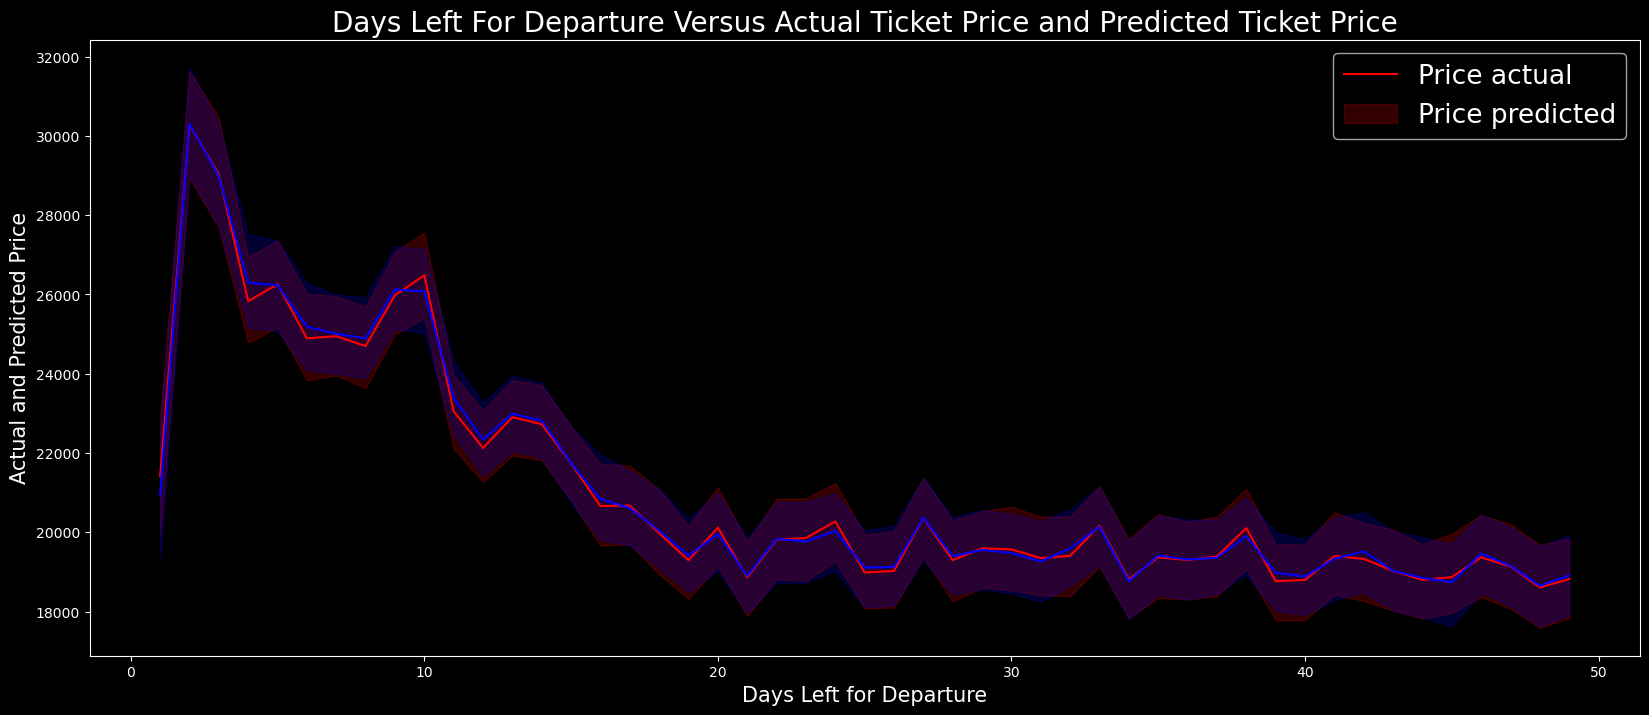

In [52]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

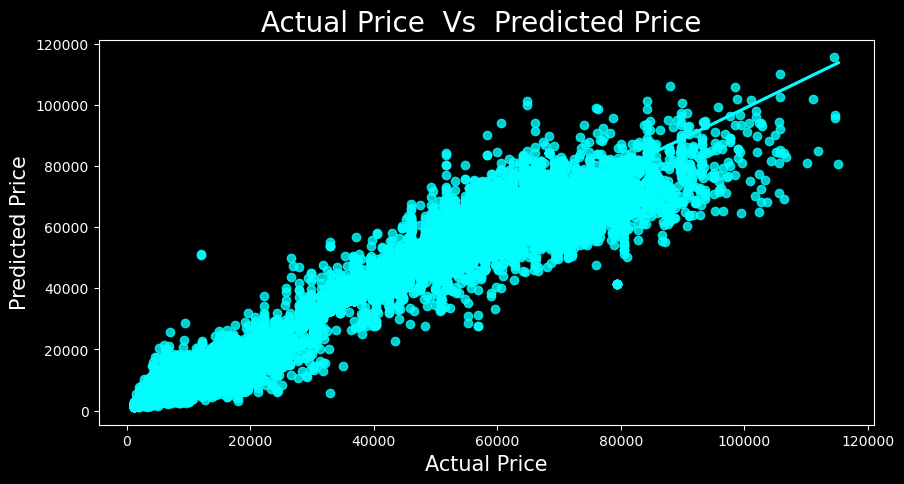

In [53]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()